<a href="https://colab.research.google.com/github/hemareddyyanala/HemaReddy_INFO5731_Fall2024/blob/main/Yanala_Hema_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here

import csv  #importing the CSV module to handle reading and writing CSV files

In [2]:
# (1) Count the frequency of all the N-grams (N=3)

# creating a function to load reviews from CSV and extract 'Cleaned_Reviews' column
def read_reviews(file_path):
    reviews_list = []  # making a list to store each cleaned review
    with open(file_path, 'r', encoding='utf-8') as f:
        csv_reader = csv.DictReader(f)
        for line in csv_reader:
            reviews_list.append(line['Cleaned_Reviews'])  #appending cleaned review to the list
    return reviews_list  #return all cleaned reviews

#defining a function to create N-grams (e.g., unigrams, bigrams, trigrams)
def create_Ngrams(text, n):
    words = text.split()  #splitting text into individual words
    ngram_list = []  # here's a list to collect all N-grams
    for i in range(len(words) - n + 1):  #looping over words to form N-grams
        ngram = " ".join(words[i:i + n])  #joining 'n' words to form an N-gram
        ngram_list.append(ngram)  # Adding the N-gram to the list
    return ngram_list  # Returning the list of N-grams

#creating a function to count occurrences of N-grams in a list of reviews
def get_Ngram_counts(reviews, n):
    ngram_freq = {}  #dictionary to store N-gram counts
    for review in reviews:
        ngrams = create_Ngrams(review, n)  #generating N-grams for the review
        for ngram in ngrams:
            if ngram in ngram_freq:
                ngram_freq[ngram] += 1  #incrementing count if N-gram already exists
            else:
                ngram_freq[ngram] = 1  #initializing count for a new N-gram
    return ngram_freq  #returning the dictionary of N-gram counts

#function to get the most frequent N-grams
def top_Ngrams(ngram_freq, num=10):
    #sorting N-grams by their frequency in descending order
    sorted_ngrams = sorted(ngram_freq.items(), key=lambda item: item[1], reverse=True)
    return sorted_ngrams[:num]  #returning the top 'num' N-grams

#loading reviews from the 1000_imdb_reviews dataset
reviews_data = read_reviews('/content/1000_imdb_reviews.csv')

#calculating unigram, bigram, and trigram counts
unigram_freq = get_Ngram_counts(reviews_data, 1)
bigram_freq = get_Ngram_counts(reviews_data, 2)
trigram_freq = get_Ngram_counts(reviews_data, 3)

# Getting the top 10 most frequent unigrams, bigrams, and trigrams
top_unigrams = top_Ngrams(unigram_freq)
top_bigrams = top_Ngrams(bigram_freq)
top_trigrams = top_Ngrams(trigram_freq)

# Printing the N-grams
print("Top 10 Unigrams:")
for unigram, count in top_unigrams:
    print(f"'{unigram}': {count}")

print("\nTop 10 Bigrams:")
for bigram, count in top_bigrams:
    print(f"'{bigram}': {count}")

print("\nTop 10 Trigrams:")
for trigram, count in top_trigrams:
    print(f"'{trigram}': {count}")


Top 10 Unigrams:
'movi': 3238
'deadpool': 2269
'film': 1720
'wolverin': 1450
'like': 1063
'marvel': 1046
'charact': 997
'one': 862
'time': 793
'see': 728

Top 10 Bigrams:
'deadpool wolverin': 624
'hugh jackman': 405
'ryan reynold': 378
'deadpool movi': 221
'marvel movi': 174
'fight scene': 149
'feel like': 141
'reynold hugh': 126
'comic book': 105
'fan servic': 99

Top 10 Trigrams:
'reynold hugh jackman': 122
'ryan reynold hugh': 106
'th centuri fox': 50
'marvel cinemat univers': 47
'hugh jackman wolverin': 41
'break fourth wall': 32
'fourth wall break': 30
'first two deadpool': 30
'comic book movi': 29
'best marvel movi': 28


In [3]:
import pandas as pd # for handling data in tabular format

In [17]:
# (2) Calculate the probabilities for all the bigrams in the dataset by using the
# fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

# generating frequency counts for unigrams and bigrams
def count_unigrams_and_bigrams(texts):
    unigram_freq = {}  # this dictionary stores unigram counts
    bigram_freq = {}  # this dictionary stores bigram counts

    # Looping through each review in the dataset using for loop
    for text in texts:
        words = text.split()  #splitting review into individual words
        for j in range(len(words)):
            #counting each unigram
            word = words[j]
            unigram_freq[word] = unigram_freq.get(word, 0) + 1  #incrementing unigram count

            # Counting each bigram
            if j < len(words) - 1:
                bigram = f"{words[j]} {words[j + 1]}"
                bigram_freq[bigram] = bigram_freq.get(bigram, 0) + 1  # incrementing bigram count

    return unigram_freq, bigram_freq  # Returning dictionaries of unigram and bigram frequencies

# compute probabilities for each bigram
def compute_bigram_probabilities(bigram_freq, unigram_freq):
    bigram_probs = []  # this list stores bigram probability data

    #looping through each bigram and calculate its probability
    for bigram, freq in bigram_freq.items():
        first_word, second_word = bigram.split()  #separating bigram into two words
        # Only computing probability if first word exists in unigram counts
        if first_word in unigram_freq:
            prob = freq / unigram_freq[first_word]  # Calculateing probability as freq(w2 w1) / freq(w1)
            bigram_probs.append({"Bigram": bigram, "Probability": prob})  # Appending to list as dictionary

    return bigram_probs  # Return list of bigram probabilities

unigram_freq, bigram_freq = count_unigrams_and_bigrams(reviews_data)  #generating unigram and bigram counts
bigram_probs = compute_bigram_probabilities(bigram_freq, unigram_freq)  #calculating bigram probabilities

# Converting results to DataFrame and display the top 100 bigram probabilities
bigram_prob_df = pd.DataFrame(bigram_probs)  # Creating DataFrame from probability data
bigram_prob_df = bigram_prob_df.reset_index(drop=True)  #reset index for clean display
print(bigram_prob_df.head(100))  #displaying top 100 entries of the dataframe


              Bigram  Probability
0       hugh jackman     0.795678
1    jackman perfect     0.008418
2   perfect wolverin     0.027174
3       wolverin fun     0.013793
4           fun movi     0.060708
..               ...          ...
95       littl littl     0.009524
96        littl wink     0.009524
97      wink audienc     0.375000
98    audienc especi     0.020408
99    especi connect     0.012048

[100 rows x 2 columns]


In [5]:
import collections  #importing the collections module
import re  #importing the regex module

In [6]:
# (3) Extract all the noun phrases and calculate the relative probabilities of each
# review in terms of other reviews (abstracts, or tweets) by using the fomular
# frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.
# Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

# making a function to clean and split the text
def clean_and_split_text(text):
    text = text.lower()  #converts the text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # removes punctuation using regular expressions
    return text.split()  #splits the cleaned text into individual words

#defining a function to extract noun phrases
def extract_words_as_noun_phrases(review_text):
    words = clean_and_split_text(review_text)  #cleaning and splitting the review into words
    return words  #returning the list of words as noun phrases (simplified)

#creating a function to calculate frequency of each noun phrase in all reviews
def compute_noun_phrase_frequencies(reviews_data):
    noun_phrase_count = collections.defaultdict(int)  #initializes a default dictionary to store frequencies
    for review in reviews_data:
        words = extract_words_as_noun_phrases(review)  # extracts words (noun phrases) from each review
        for word in words:
            noun_phrase_count[word] += 1  # incrementing the count for each word/noun phrase
    return noun_phrase_count  # returning the dictionary of noun phrase frequencies

# creating a function to calculate the relative probability of each noun phrase
def compute_relative_probabilities_for_reviews(reviews_data, noun_phrase_count):
    max_frequency = max(noun_phrase_count.values())  # finding the highest frequency of any noun phrase
    probability_results = []  # List to store the probability results for each review

    for review in reviews_data:
        words_in_review = extract_words_as_noun_phrases(review)  # Extracts words from the review
        review_probabilities = {}  # this dictionary stores probabilities for this review

        #calculating relative probabilities for each noun phrase in the review
        for word in words_in_review:
            frequency = noun_phrase_count.get(word, 0)  # Getting frequency of the word, default to 0
            relative_prob = frequency / max_frequency if max_frequency > 0 else 0  # Computing relative probability
            review_probabilities[word] = relative_prob  #storing the probability

        probability_results.append(review_probabilities)  # adding this review's results to the list

    return probability_results  # Returning the list of probability results for all reviews

# defining a function to display the results in a tabular format
def display_results_in_table(reviews_data, noun_phrase_count, probability_results):
    noun_phrases = list(noun_phrase_count.keys())  # Geting the list of all unique noun phrases
    table_data = []  # list to store data for the table

    # Looping through the probability results to create rows for the table
    for review_probabilities in probability_results:
        row = [review_probabilities.get(np, 0) for np in noun_phrases]
        table_data.append(row)  # Appending the row to the table data list

    df = pd.DataFrame(table_data, columns=noun_phrases)  # this creates a DataFrame from the table data
    df.index = [f"Review {i+1}" for i in range(len(reviews_data))]

    print("Displaying table with noun phrases as columns and reviews as rows:")
    print(df)

# computing the frequency of each noun phrase across the reviews
noun_phrase_frequency = compute_noun_phrase_frequencies(reviews_data)

# computing relative probabilities for each review based on noun phrase frequencies
relative_probabilities = compute_relative_probabilities_for_reviews(reviews_data, noun_phrase_frequency)

# showing the results in a table
display_results_in_table(reviews_data, noun_phrase_frequency, relative_probabilities)


Displaying table with noun phrases as columns and reviews as rows:
                 hugh   jackman   perfect  wolverin       fun  movi      like  \
Review 1     0.157196  0.183447  0.056825  0.447807  0.183138   1.0  0.328289   
Review 2     0.157196  0.183447  0.000000  0.000000  0.183138   1.0  0.328289   
Review 3     0.157196  0.183447  0.056825  0.447807  0.183138   1.0  0.328289   
Review 4     0.000000  0.183447  0.000000  0.000000  0.000000   1.0  0.000000   
Review 5     0.000000  0.000000  0.000000  0.447807  0.183138   0.0  0.000000   
...               ...       ...       ...       ...       ...   ...       ...   
Review 996   0.157196  0.183447  0.000000  0.000000  0.183138   1.0  0.328289   
Review 997   0.000000  0.000000  0.000000  0.447807  0.000000   1.0  0.000000   
Review 998   0.000000  0.000000  0.000000  0.447807  0.000000   1.0  0.328289   
Review 999   0.157196  0.183447  0.000000  0.000000  0.183138   1.0  0.328289   
Review 1000  0.157196  0.183447  0.056825 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [7]:
# Write your code here

import math  #importing math module for mathematical operations
from collections import defaultdict  #importing defaultdict for easy counting

In [8]:
# (1) To build the documents-terms weights (tf * idf) matrix.

#loading the dataset and preprocess the reviews
def load_reviews(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)  #initializing CSV reader
        next(reader)  #skipping the header if it exists
        reviews = [row[0] for row in reader]  #extracting reviews from the first column
    return reviews

def calculate_term_frequencies(reviews):  # Defining function to calculate term frequencies
    term_freqs = defaultdict(lambda: defaultdict(int))
    for review_idx, review in enumerate(reviews):  # Looping through each review
        words = review.lower().split()  #tokenizing and converting to lowercase
        for word in words:  # Looping through each word
            term_freqs[review_idx][word] += 1  #incrementing the count for each word
    #normalizing the TF values
    for review_idx, word_counts in term_freqs.items():  # to iterate through term frequencies
        total_words = sum(word_counts.values())
        for word in word_counts:
            word_counts[word] /= total_words  # dividing by total words to normalize
    return term_freqs

def calculate_inverse_document_frequency(reviews):  #defining function to calculate IDF
    idf_values = defaultdict(int)  #initializing defaultdict for storing IDF values
    total_reviews = len(reviews)  # Total number of reviews

    for review in reviews:  # Looping through each review
        unique_words = set(review.lower().split())
        for word in unique_words:  #looping through unique words
            idf_values[word] += 1

    #applying smoothing to avoid division by zero
    for word in idf_values:
        idf_values[word] = math.log(total_reviews / (idf_values[word] + 1))  # Calculating the IDF value

    return idf_values

def build_tfidf_matrix(term_freqs, idf_values):  # Defining function to build the TF-IDF matrix
    tfidf_matrix = defaultdict(lambda: defaultdict(float))  # Initializing nested defaultdict for TF-IDF matrix
    for review_idx, word_counts in term_freqs.items():  # Looping through term frequencies
        for word, freq in word_counts.items():
            tfidf_matrix[review_idx][word] = freq * idf_values[word]  # Multiplying TF by IDF for each word
    return tfidf_matrix

def calculate_cosine_similarity(query_vec, doc_vec):  # Defining function to calculate cosine similarity
    dot_product = sum(query_vec[word] * doc_vec.get(word, 0) for word in query_vec)  # Computing dot product
    query_magnitude = math.sqrt(sum(val ** 2 for val in query_vec.values()))  #computing query magnitude
    doc_magnitude = math.sqrt(sum(val ** 2 for val in doc_vec.values()))  #computing document magnitude

    if query_magnitude == 0 or doc_magnitude == 0:  #handling zero magnitude case
        return 0.0  # 0 if either vector is zero magnitude
    return dot_product / (query_magnitude * doc_magnitude)  # Returning cosine similarity

def generate_query_vector(query, idf_values):  #defining function to generate query vector
    query_vector = defaultdict(float)  # Initializing defaultdict for query vector
    query_tokens = query.lower().split()
    num_tokens = len(query_tokens)

    for token in query_tokens:  # Looping through query tokens
        query_vector[token] += 1 / num_tokens  #normalizing frequency by total tokens
    # Multiplying by IDF values
    for word in query_vector:  # Looping through query vector words
        query_vector[word] *= idf_values[word]  # Multiplying by IDF value for each term

    return query_vector

tf_values = calculate_term_frequencies(reviews_data)  # Calculating term frequencies for all reviews
idf_values = calculate_inverse_document_frequency(reviews_data)  # Calculating IDF for the corpus
tfidf_matrix = build_tfidf_matrix(tf_values, idf_values)  # Building the TF-IDF matrix for all reviews

#query
input_query = "A beautifully directed film with a powerful storyline, exceptional acting, and breathtaking cinematography. The emotional depth and suspense kept me engaged throughout, and the character arcs were profoundly satisfying."  # Define input query
query_vector = generate_query_vector(input_query, idf_values)  #generating query vector

#calculateing cosine similarity between the query and each review's TF-IDF vector
similarity_scores = []
for review_idx, review_vector in tfidf_matrix.items():  # Looping through TF-IDF matrix
    similarity = calculate_cosine_similarity(query_vector, review_vector)
    similarity_scores.append((review_idx, similarity))  # Storing review index and similarity score

similarity_scores.sort(key=lambda x: x[1], reverse=True)  # Sort by similarity score in descending order



In [16]:
print("\nTF-IDF Matrix for Reviews:")  # Printing the TF-IDF matrix
for review_idx, word_scores in tfidf_matrix.items():
    print(f"Review {review_idx}:")
    for word, score in word_scores.items():  # Looping through word scores
        print(f"  {word}: {score:.4f}")
    print()

Streaming output truncated to the last 5000 lines.
  obscur: 0.0060
  sure: 0.0059
  enjoy: 0.0033
  oooh: 0.0081
  must: 0.0037
  behind: 0.0042
  logic: 0.0059
  care: 0.0033
  slightest: 0.0069
  electra: 0.0052
  screen: 0.0076
  away: 0.0063
  wasnt: 0.0061
  long: 0.0053
  reject: 0.0067
  took: 0.0040
  bunch: 0.0094
  bore: 0.0034
  complet: 0.0065
  meaningless: 0.0059
  johnni: 0.0048
  storm: 0.0049
  u: 0.0058
  guess: 0.0042
  matter: 0.0040
  got: 0.0025
  meh: 0.0055
  anywaysit: 0.0081
  rewatch: 0.0045
  valu: 0.0053
  supris: 0.0063
  awesom: 0.0033
  would: 0.0017
  differ: 0.0030
  characr: 0.0081
  actual: 0.0026
  stori: 0.0013
  sandman: 0.0081
  lizard: 0.0081
  stop: 0.0034
  simpli: 0.0040
  tobey: 0.0076
  andrew: 0.0076
  gave: 0.0037
  willem: 0.0081
  dafo: 0.0081
  came: 0.0034
  charactersi: 0.0081
  silli: 0.0051
  entertain: 0.0021
  v: 0.0049
  armi: 0.0060
  handsom: 0.0081
  fine: 0.0045
  funnier: 0.0059
  coin: 0.0076
  flip: 0.0081
  hilari: 0.00

In [10]:
# (2) To rank the documents with respect to query (design a query by yourself,
# for example, "An Outstanding movie with a haunting performance and best character
# development") by using cosine similarity.

# Showing the rankings based on cosine similarity
print("\nDocument Rankings Based on Query Similarity:")
for rank, (review_idx, similarity) in enumerate(similarity_scores, start=1):
    print(f"Rank {rank} --> Review {review_idx} with Similarity Score = {similarity:.4f}")  # printing the ranking and similarity score


Document Rankings Based on Query Similarity:
Rank 1 --> Review 858 with Similarity Score = 0.1276
Rank 2 --> Review 276 with Similarity Score = 0.1200
Rank 3 --> Review 599 with Similarity Score = 0.1119
Rank 4 --> Review 181 with Similarity Score = 0.1021
Rank 5 --> Review 291 with Similarity Score = 0.1014
Rank 6 --> Review 943 with Similarity Score = 0.0930
Rank 7 --> Review 603 with Similarity Score = 0.0794
Rank 8 --> Review 392 with Similarity Score = 0.0793
Rank 9 --> Review 688 with Similarity Score = 0.0727
Rank 10 --> Review 773 with Similarity Score = 0.0713
Rank 11 --> Review 234 with Similarity Score = 0.0696
Rank 12 --> Review 751 with Similarity Score = 0.0691
Rank 13 --> Review 496 with Similarity Score = 0.0664
Rank 14 --> Review 617 with Similarity Score = 0.0660
Rank 15 --> Review 60 with Similarity Score = 0.0657
Rank 16 --> Review 852 with Similarity Score = 0.0650
Rank 17 --> Review 788 with Similarity Score = 0.0633
Rank 18 --> Review 52 with Similarity Score = 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [11]:
# Write your code here

# Importing necessary libraries
from gensim.models import Word2Vec  # for creating word embeddings
import nltk  # for natural language processing tasks
from nltk.tokenize import word_tokenize  # for tokenizing text into words

nltk.download('punkt')  # downloads tokenizer data for splitting text into words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
# (1) Train a 300-dimension word embedding (it can be word2vec, glove,
# ulmfit, bert, or others).

# Loading the dataset
data = pd.read_csv('1000_imdb_reviews.csv')

#tokenizing the 'Cleaned_Reviews' column
data['tokens'] = data['Cleaned_Reviews'].dropna().apply(word_tokenize)  # split reviews into tokens

# Initializing the Word2Vec model
embedding_model = Word2Vec(vector_size=300, window=5, min_count=1, workers=4)

#building the vocabulary based on the tokenized reviews
embedding_model.build_vocab(data['tokens'], progress_per=1000)

total_epochs = 30  # number of times to iterate over the dataset during training

# Training the model for the defined number of epochs, displaying progress
for epoch in range(total_epochs):  # loop through epochs
    embedding_model.train(data['tokens'], total_examples=embedding_model.corpus_count, epochs=1)  # training for one epoch
    print(f"Training Epoch {epoch + 1}/{total_epochs} completed.")  # printing progress after each epoch

#saving the trained model to a binary file
embedding_model.save('imdb_reviews_word2vec.bin')  # saving model to file for future use

# Printing the model summary to inspect parameters and vocabulary
print("Trained Word2Vec Model Summary:")  # messaging indicating model summary
print(embedding_model)  #printing out model details, including vocabulary size

Training Epoch 1/30 completed.


Training Epoch 2/30 completed.


Training Epoch 3/30 completed.


Training Epoch 4/30 completed.


Training Epoch 5/30 completed.


Training Epoch 6/30 completed.


Training Epoch 7/30 completed.


Training Epoch 8/30 completed.


Training Epoch 9/30 completed.


Training Epoch 10/30 completed.


Training Epoch 11/30 completed.


Training Epoch 12/30 completed.


Training Epoch 13/30 completed.


Training Epoch 14/30 completed.


Training Epoch 15/30 completed.


Training Epoch 16/30 completed.


Training Epoch 17/30 completed.


Training Epoch 18/30 completed.


Training Epoch 19/30 completed.


Training Epoch 20/30 completed.


Training Epoch 21/30 completed.


Training Epoch 22/30 completed.


Training Epoch 23/30 completed.


Training Epoch 24/30 completed.


Training Epoch 25/30 completed.


Training Epoch 26/30 completed.


Training Epoch 27/30 completed.


Training Epoch 28/30 completed.


Training Epoch 29/30 completed.
Training Epoch 30/30 completed.
Trained Word2Vec Model Summary:
Word2Vec<vocab=9870, vector_size=300, alpha=0.025>


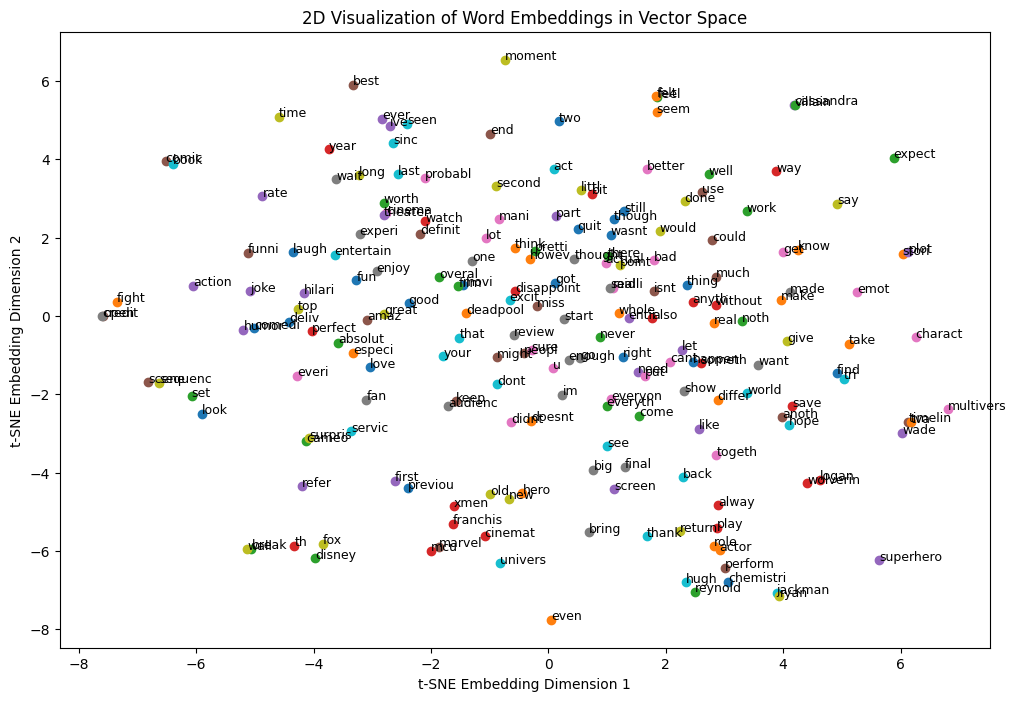

In [20]:
# Visualizing word embeddings using t-SNE
from sklearn.manifold import TSNE  # import t-SNE for dimensionality reduction
import matplotlib.pyplot as plt  # for plotting the 2D embeddings

# Selecting first 200 words to visualize
selected_words = list(embedding_model.wv.index_to_key)[:200]  # getting first 200 words in model's vocabulary
word_embeddings = embedding_model.wv[selected_words]  # extracting word vectors for these words

#applying t-SNE for dimensionality reduction
tsne_model = TSNE(n_components=2, random_state=0)  # creating t-SNE model for 2D reduction
reduced_embeddings = tsne_model.fit_transform(word_embeddings)  # reducing the word embeddings to 2D

# Plotting the 2D representation of word embeddings
plt.figure(figsize=(12, 8))  # creating a new figure with specific size
for idx, word in enumerate(selected_words):  # iterating over words and their indices
    plt.scatter(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1])  # plotting the 2D points
    plt.annotate(word, xy=(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1]), fontsize=9)  # annotating with word

plt.title("2D Visualization of Word Embeddings in Vector Space")  # title for the plot
plt.xlabel("t-SNE Embedding Dimension 1")  # label for x-axis
plt.ylabel("t-SNE Embedding Dimension 2")  # label for y-axis
plt.show()  #displaying the plot

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [14]:
# The GitHub link of your final csv file


# Link:


### original dataset
https://drive.google.com/drive/folders/1W6yN3WRrncqOTj_HPk5muiMdtceF7B-d?usp=sharing

### annotated dataset
https://github.com/hemareddyyanala/HemaReddy_INFO5731_Fall2024/blob/main/annotated_1000_imdb_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [19]:
# Type your answer
'''
The assignment gave me a valuable learning experience, but it was challenging,
especially in terms of data preprocessing,
TF-IDF matrix construction, and similarity calculations, requiring
good time management and understanding of the concepts.
I would suggest to give more time for submitting assignments as they need a lot of
time to complete.
'''

'\nThe assignment gave me a valuable learning experience, but it was challenging, \nespecially in terms of data preprocessing,\nTF-IDF matrix construction, and similarity calculations, requiring\ngood time management and understanding of the concepts.\nI would suggest to give more time for submitting assignments as they need a lot of \ntime to complete.\n'